In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Loading the Data
train_X = pd.read_csv('data/pca_train_data.csv', index_col=0)
metadata = pd.read_csv('data/select_train_meta.csv', index_col=0)
train_Y = metadata['target']

In [4]:
dropout = 0.35
learning_rate = 0.005
train_epochs=100

In [5]:
def dense_model():
    # Define the network
    model = Sequential()
    model.add(Dense(2048, input_dim=train_X.shape[1]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(384))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mean_squared_error',
                  optimizer=optimizers.SGD(lr=learning_rate),
                  metrics=['accuracy'])
    
    return model

In [6]:
neural_network = KerasClassifier(build_fn=dense_model, epochs=train_epochs, batch_size=32, verbose=1)

In [7]:
scoring = {'accuracy': 'accuracy', 'recall': 'recall', 
           'precision': 'precision', 'f1': 'f1', 'mcc': make_scorer(matthews_corrcoef)}

In [8]:
cv_results = cross_validate(neural_network, train_X, train_Y, scoring=scoring, return_train_score=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1838 - acc: 0.7263
Epoch 2/100
1750/1750 [==============================] - 2s 863us/step - loss: 0.1576 - acc: 0.7777
Epoch 3/100
1750/1750 [==============================] - 1s 843us/step - loss: 0.1488 - acc: 0.7851
Epoch 4/100
1750/1750 [==============================] - 1s 834us/step - loss: 0.1427 - acc: 0.8011
Epoch 5/100
1750/1750 [==============================] - 2s 858us/step - loss: 0.1434 - acc: 0.7949
Epoch 6/100
1750/1750 [==============================] - 2s 858us/step - loss: 0.1418 - acc: 0.7977
Epoch 7/100
1750/1750 [==============================] - 1s 851us/step - loss: 0.1406 - acc: 0.8069
Epoch 8/100
1750/1750 [==============================] - 2s 860us/step - loss: 0.1401 - acc: 0.7977
Epoch 9/100
1750/1750 [==============================] - 1s 853us/step - loss: 0.1374 - acc: 0.7966
Epoch 10/100
1750/1750 [==============================

1750/1750 [==============================] - 2s 874us/step - loss: 0.1325 - acc: 0.7994
Epoch 80/100
1750/1750 [==============================] - 2s 867us/step - loss: 0.1330 - acc: 0.8074
Epoch 81/100
1750/1750 [==============================] - 1s 856us/step - loss: 0.1323 - acc: 0.8040
Epoch 82/100
1750/1750 [==============================] - 1s 855us/step - loss: 0.1326 - acc: 0.8040
Epoch 83/100
1750/1750 [==============================] - 2s 871us/step - loss: 0.1339 - acc: 0.7983
Epoch 84/100
1750/1750 [==============================] - 2s 859us/step - loss: 0.1351 - acc: 0.7914
Epoch 85/100
1750/1750 [==============================] - 2s 861us/step - loss: 0.1291 - acc: 0.8149
Epoch 86/100
1750/1750 [==============================] - 2s 860us/step - loss: 0.1327 - acc: 0.8046
Epoch 87/100
1750/1750 [==============================] - 2s 875us/step - loss: 0.1328 - acc: 0.8063
Epoch 88/100
1750/1750 [==============================] - 2s 867us/step - loss: 0.1328 - acc: 0.8074
Epo

1750/1750 [==============================] - 1s 855us/step - loss: 0.1271 - acc: 0.8114
Epoch 55/100
1750/1750 [==============================] - 2s 876us/step - loss: 0.1294 - acc: 0.8017
Epoch 56/100
1750/1750 [==============================] - 2s 872us/step - loss: 0.1258 - acc: 0.8097
Epoch 57/100
1750/1750 [==============================] - 1s 850us/step - loss: 0.1291 - acc: 0.8097
Epoch 58/100
1750/1750 [==============================] - 2s 865us/step - loss: 0.1305 - acc: 0.7971
Epoch 59/100
1750/1750 [==============================] - 1s 823us/step - loss: 0.1275 - acc: 0.8057
Epoch 60/100
1750/1750 [==============================] - 1s 841us/step - loss: 0.1299 - acc: 0.8017
Epoch 61/100
1750/1750 [==============================] - 1s 837us/step - loss: 0.1307 - acc: 0.7983
Epoch 62/100
1750/1750 [==============================] - 1s 853us/step - loss: 0.1292 - acc: 0.8046
Epoch 63/100
1750/1750 [==============================] - 1s 842us/step - loss: 0.1264 - acc: 0.8126
Epo

1750/1750 [==============================] - 1s 810us/step - loss: 0.1431 - acc: 0.7794
Epoch 30/100
1750/1750 [==============================] - 1s 794us/step - loss: 0.1421 - acc: 0.7800
Epoch 31/100
1750/1750 [==============================] - 1s 792us/step - loss: 0.1411 - acc: 0.7840
Epoch 32/100
1750/1750 [==============================] - 1s 784us/step - loss: 0.1442 - acc: 0.7811
Epoch 33/100
1750/1750 [==============================] - 1s 799us/step - loss: 0.1456 - acc: 0.7749
Epoch 34/100
1750/1750 [==============================] - 1s 805us/step - loss: 0.1459 - acc: 0.7766
Epoch 35/100
1750/1750 [==============================] - 1s 783us/step - loss: 0.1436 - acc: 0.7846
Epoch 36/100
1750/1750 [==============================] - 1s 799us/step - loss: 0.1424 - acc: 0.7766
Epoch 37/100
1750/1750 [==============================] - 1s 793us/step - loss: 0.1405 - acc: 0.7874
Epoch 38/100
1750/1750 [==============================] - 1s 789us/step - loss: 0.1436 - acc: 0.7754
Epo

In [9]:
cv_results

{'fit_time': array([151.92913318, 152.81737685, 142.11593509]),
 'score_time': array([0.71251893, 0.75427723, 0.77443981]),
 'test_accuracy': array([0.76228571, 0.73485714, 0.74857143]),
 'train_accuracy': array([0.75085714, 0.76342857, 0.77314286]),
 'test_recall': array([0.75129534, 0.72631579, 0.77464789]),
 'train_recall': array([0.75      , 0.77910448, 0.85117493]),
 'test_precision': array([0.47540984, 0.43396226, 0.36912752]),
 'train_precision': array([0.41362126, 0.43427621, 0.48948949]),
 'test_f1': array([0.58232932, 0.54330709, 0.5       ]),
 'train_f1': array([0.53319058, 0.55769231, 0.62154433]),
 'test_mcc': array([0.44958787, 0.39734713, 0.4031535 ]),
 'train_mcc': array([0.4135479 , 0.44642502, 0.51304633])}

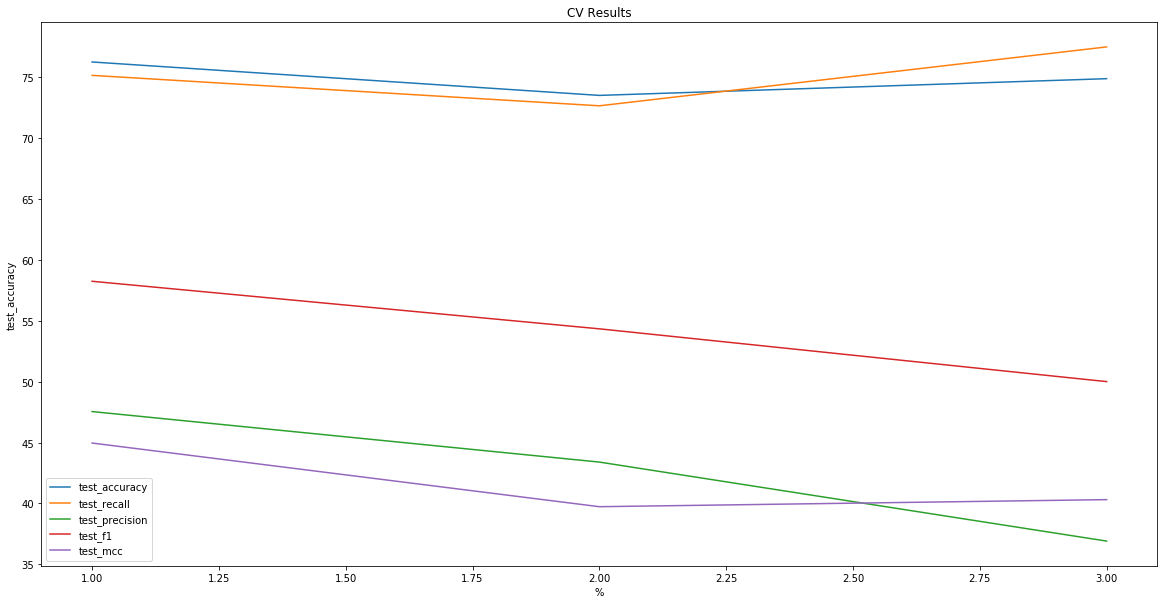

In [10]:
fig, ax1 = plt.subplots(figsize=(20, 10))
cv_folds = list(range(1, len(cv_results['fit_time']) + 1))
ax1.plot(cv_folds, cv_results['test_accuracy'] * 100)
ax1.plot(cv_folds, cv_results['test_recall'] * 100)
ax1.plot(cv_folds, cv_results['test_precision'] * 100)
ax1.plot(cv_folds, cv_results['test_f1'] * 100)
ax1.plot(cv_folds, cv_results['test_mcc'] * 100)
ax1.set(xlabel='%', ylabel='test_accuracy', title='CV Results')
ax1.legend(['test_accuracy', 'test_recall', 'test_precision', 'test_f1', 'test_mcc']);